In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import tarfile
import os 
import io
PATH = "/home-local/Frederic/Datasets/FLCDataset/dataset-full-images.tar"

Number of files: 37387


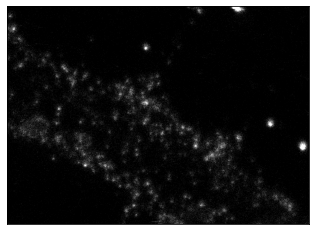

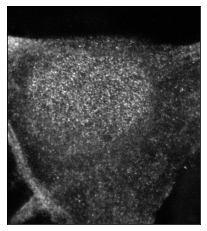

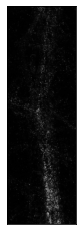

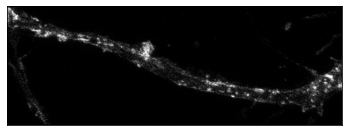

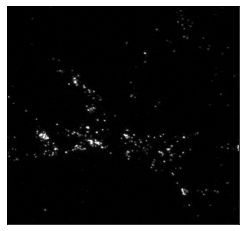

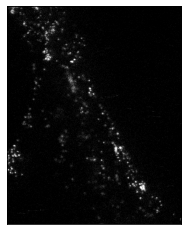

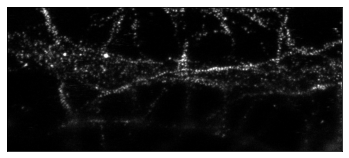

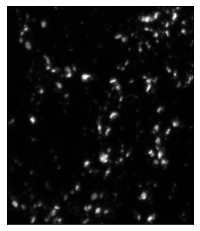

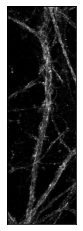

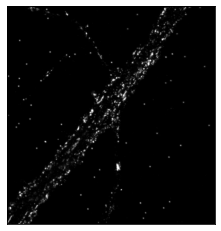

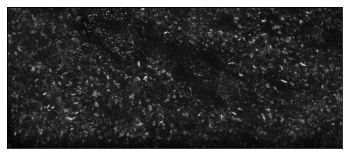

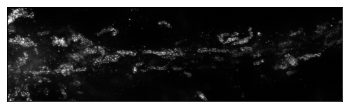

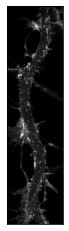

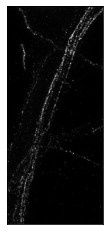

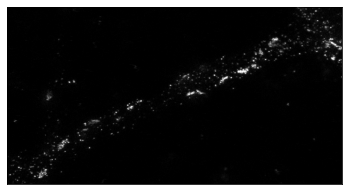

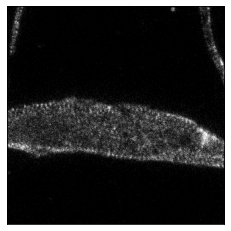

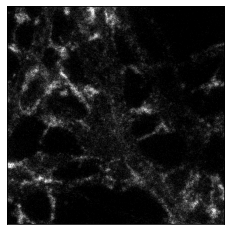

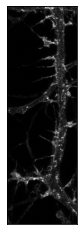

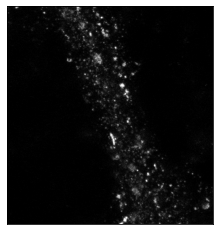

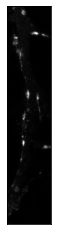

In [12]:
with tarfile.open(PATH, "r") as handle:
    names = handle.getnames()
    N = len(names)
    print(f"Number of files: {N}")
    indices = np.random.choice(N, size=20, replace=False)
    for i in indices:
        member = handle.extractfile(names[i])
        buffer = io.BytesIO()
        buffer.write(member.read())
        buffer.seek(0)
        data = np.load(buffer, allow_pickle=True)
        data = {key : values for key, values in data.items()}
        img = data["image"] / 255.0
        fig = plt.figure()
        plt.imshow(img, vmin=0, vmax=1, cmap='gray')
        plt.xticks([])
        plt.yticks([])
        fig.savefig(f"../temporary/image_{i}_{img.shape[0]}_{img.shape[1]}.pdf", transparent=True, dpi=1200)
        